# Unsupervised Analysis of Days of Week
Treating crossing each day as features to learn about the relationships between various days.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get Data

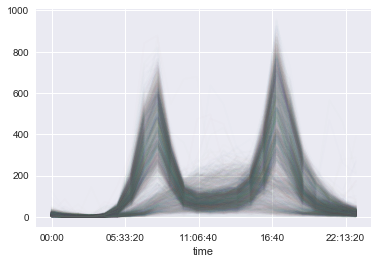

In [2]:
from jupyterworkflow.data import get_fremont_data
data = get_fremont_data()

pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=.01);

## Principal Component Analysis

In [3]:
X = pivoted.fillna(0).T.values
X.shape

(2340, 24)

In [4]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape


(2340, 2)

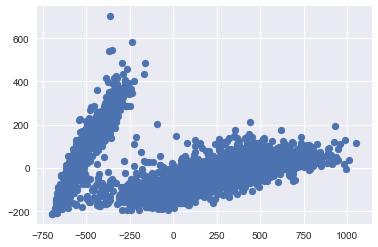

In [5]:
plt.scatter(X2[:,0], X2[:,1]);

## Unsupervised Clustering

In [6]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

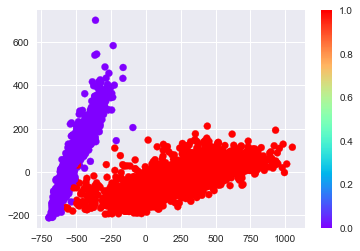

In [7]:
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='rainbow')
plt.colorbar();

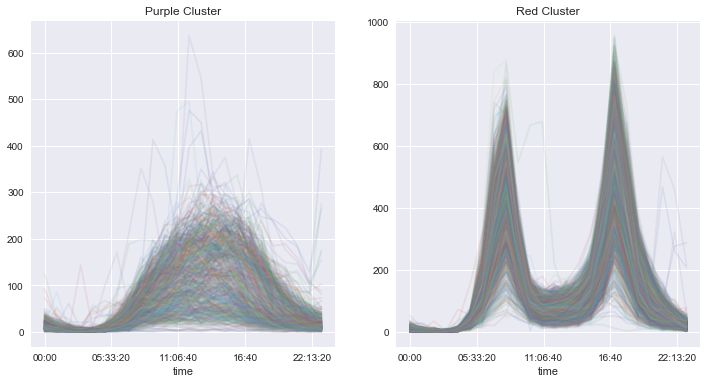

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

pivoted.T[labels==0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels==1].T.plot(legend=False, alpha=0.1, ax=ax[1])

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster');

## Comparing with Day of Week

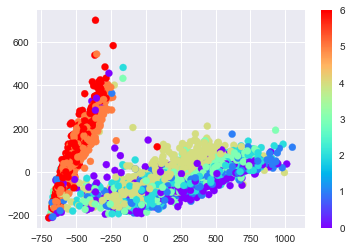

In [9]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
plt.scatter(X2[:,0], X2[:,1], c=dayofweek, cmap='rainbow', )
plt.colorbar();

## Analyzing Outliers
The following points are weekdays with a holiday like pattern.

In [10]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels==1)&(dayofweek<5)] # there are 63 such days which are not weekends

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2019-02-15', '2019-02-18', '2019-02-19', '2019-02-20',
               '2019-02-21', '2019-02-22', '2019-02-25', '2019-02-26',
               '2019-02-27', '2019-02-28'],
              dtype='datetime64[ns]', length=1609, freq=None)

What's up with February 6th of 2017? [Snow Storm](https://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/)